In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pickle

In [338]:
login_dets = {'username' : 'zacharylim98', 'password' : 'Psalm27wimme!'}
outfile = open("login_dets",'wb')
pickle.dump(login_dets,outfile)
outfile.close()

In [16]:
driver = webdriver.Chrome()

driver.get(r"https://newcreation.brushfire.com/4AprCWP830/501456/Questions?attendeeId=5ea6494c-1cfb-4d97-a3c8-a69065c4c1ca")

driver.implicitly_wait(20)

continue1 = driver.find_element_by_xpath('//*[@id="body"]/div[1]/div/div[4]/div[1]/div/div[1]/div[3]/div[3]/div[2]/a').click()

continue2 = driver.find_element_by_xpath('//*[@id="body"]/div[1]/div/div[4]/div[4]/div[4]/div[1]/div[1]/div/div[2]/div[3]/p/a').click()

continue3 = driver.find_element_by_xpath('//*[@id="body"]/div[1]/div/div[4]/div[6]/div[1]/div/div/form/div[3]/button').click()

continue4 = driver.find_element_by_xpath('//*[@id="body"]/div[1]/div/div[4]/div[4]/div[4]/div[2]/div[1]/div/div[2]/div/div/form[2]/a').click()

name1 = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[1]/div[1]/div/div/div[1]/input').send_keys("QiHua")
last1 = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[1]/div[1]/div/div/div[2]/input').send_keys("Woo")
number1 = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[1]/div[2]/div/input').send_keys("98728272")
ministry1 = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[1]/div[3]/div/select/option[34]').click()
acknowledgement = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[1]/div[5]/div/label[2]/input').click()

continue5 = driver.find_element_by_xpath('//*[@id="body"]/div[1]/div/div[4]/div/div[1]/div/div/form/div[2]/div[4]/div[2]/div/button').click()

email1 = driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/div[2]/form/div[1]/div/div[2]/div[1]/input').send_keys("wooqihua@gmail.com")

continue6 = 

In [343]:
infile = open("login_dets",'rb')
info = pickle.load(infile)
infile.close()

driver = webdriver.Chrome()

driver.get(r"https://invest.tdameritrade.com.sg/tdaa/index.html#!/accountLobby/statements/confirms")

driver.implicitly_wait(20)

email_box = driver.find_element_by_xpath(R'//*[@id="username"]')
email_box.send_keys(info["username"])

password_box = driver.find_element_by_xpath('//*[@id="password"]')
password_box.send_keys(info["password"])

login = driver.find_element_by_xpath('//*[@id="loginForm"]')
login.click()

account = driver.find_element_by_xpath('//*[@id="accountCode"]/option[2]')
account.click()

account_btn = driver.find_element_by_xpath('//*[@id="tradeConfirmationSearchForm"]')
account_btn.click()

tags = driver.find_element_by_class_name('account-summary-table')

In [344]:
html = tags.get_attribute('innerHTML')
soup = BeautifulSoup(html, "html")

In [345]:
def parse_html_table(table):
            n_columns = 0
            n_rows=0
            column_names = []
    
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                        column_names.append(th.get_text())
    
            # Safeguard on Column Titles
            if len(column_names) > 0 and len(column_names) != n_columns:
                raise Exception("Column titles do not match the number of columns")
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            row_marker = 0
            for row in table.find_all('tr'):
                column_marker = 0
                columns = row.find_all('td')
                for column in columns:
                    df.iat[row_marker,column_marker] = column.get_text()
                    column_marker += 1
                if len(columns) > 0:
                    row_marker += 1
                    
            # Convert to float if possible
            for col in df:
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    pass
            
            return df

In [346]:
transc_df = parse_html_table(soup)
transc_df["Net Amt"] = transc_df["Net Amt"].str.replace(",","").astype(float)

In [347]:
transc_df["amt"] = np.where(transc_df["B/S"] == '   Sold  ', transc_df["Net Amt"] , -transc_df["Net Amt"])

In [119]:
transc_df["acc_val"] = transc_df[["Date", "amt"]].groupby("Date").apply(lambda x: x.cumsum())["amt"]

In [124]:
transc_df["acc_val"] = transc_df["amt"].cumsum()

<AxesSubplot:>

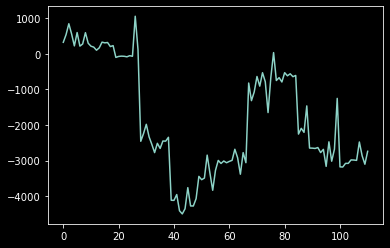

In [126]:
transc_df["acc_val"].plot()

In [356]:
pl_df.columns = pl_df.columns.get_level_values(0)

In [360]:
pl_df

,Symbol,value,count,Date,ticker,Month,Day,Year,Strike,Type,Exp
0,AAPL Mar 19 2021 127.5 Put,466.56,2,02/23/2021,AAPL,Mar,19,2021,127.5,Put,Mar192021
1,AAPL Mar 19 2021 130.0 Put,-554.43,2,02/23/2021,AAPL,Mar,19,2021,130.0,Put,Mar192021
2,AAPL Mar 26 2021 128.0 Put,-444.42,2,03/16/2021,AAPL,Mar,26,2021,128.0,Put,Mar262021
3,AAPL Mar 26 2021 131.0 Put,435.56,2,03/16/2021,AAPL,Mar,26,2021,131.0,Put,Mar262021
4,AAPL May 21 2021 120.0 Put,-476.71,1,03/16/2021,AAPL,May,21,2021,120.0,Put,May212021
...,...,...,...,...,...,...,...,...,...,...,...
57,WKHS Dec 18 2020 18.0 Put,-13.43,2,11/10/2020,WKHS,Dec,18,2020,18.0,Put,Dec182020
58,WKHS Nov 20 2020 20.0 Put,21.57,2,10/21/2020,WKHS,Nov,20,2020,20.0,Put,Nov202020
59,WMT Apr 01 2021 125.0 Put,-121.42,2,03/29/2021,WMT,Apr,01,2021,125.0,Put,Apr012021
60,WMT Apr 01 2021 130.0 Put,252.58,2,03/29/2021,WMT,Apr,01,2021,130.0,Put,Apr012021


In [359]:
pl_df.columns = ['Symbol', 'value', 'count', 'Date', 'ticker', 'Month', 'Day', 'Year',
       'Strike', 'Type', 'Exp']

In [348]:
pl_df = transc_df.groupby(['Symbol']).agg({'amt': ['sum', 'count'], 'Date': 'last'}).reset_index()

In [350]:
pl_df[["ticker", "Month", "Day", "Year", "Strike", "Type"]] = pl_df["Symbol"].str.split(' ', 0, expand=True).dropna().iloc[:,3:9]

In [351]:
pl_df["Exp"] = pl_df["Month"] + pl_df["Day"] + pl_df["Year"]

In [361]:
plexp_df = pl_df[pl_df["count"] >= 2].groupby(['ticker','Exp']).agg({'value' : 'sum', "Date" : 'last'})

In [362]:
plexp_df = plexp_df.reset_index()

In [299]:
plexp_df["Date"] = pd.to_datetime(plexp_df["Date"])

In [368]:
plot_df = plexp_df.sort_values("Date").groupby("Date").agg({'value': 'sum'}).reset_index().set_index("Date")

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
plot_df = plot_df.set_index("Date")

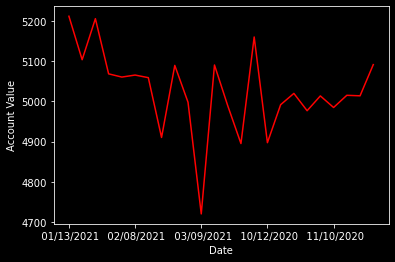

In [371]:
ax = (plot_df["value"]+4998).plot(linewidth=1.5, color="red")
ax.set_ylabel("Account Value")

plt.savefig("funk.png")